In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial import distance

In [8]:
dfAbnormal1 = pd.read_csv("../cleanData/clean_abnormal1.csv")
dfnormal1 = pd.read_csv("../cleanData/clean_normal.csv")
dfAbnormal = pd.read_csv("../cleanData/clean_abnormal1.csv")
dfnormal = pd.read_csv("../cleanData/clean_normal.csv")


dfAbnormal_1 = pd.concat([dfAbnormal, dfAbnormal1], ignore_index=True)
dfnormal_1 = pd.concat([dfnormal, dfnormal1], ignore_index=True)

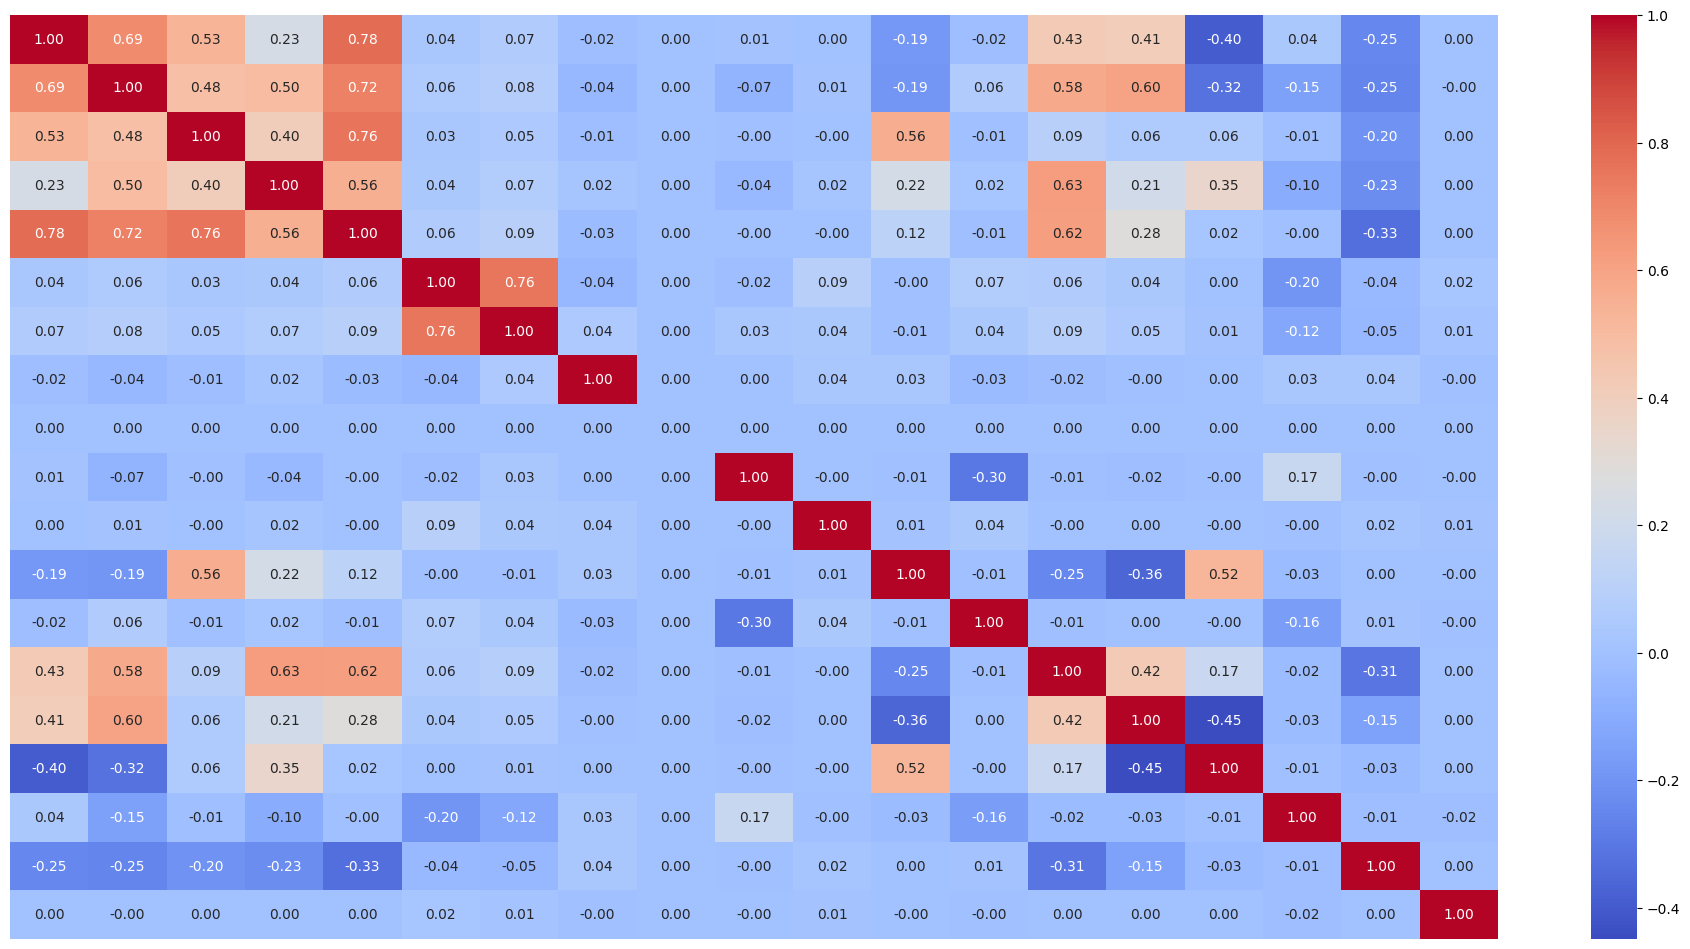

In [10]:
# Compute correlation matrix
correlation_matrix_abnormal = dfAbnormal_1.corr()

# Fill NaN values with 0
correlation_matrix_abnormal = correlation_matrix_abnormal.fillna(0)

# Plot heatmap
plt.figure(figsize=(24, 12))
sns.heatmap(correlation_matrix_abnormal, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=False, yticklabels=False)
plt.show()


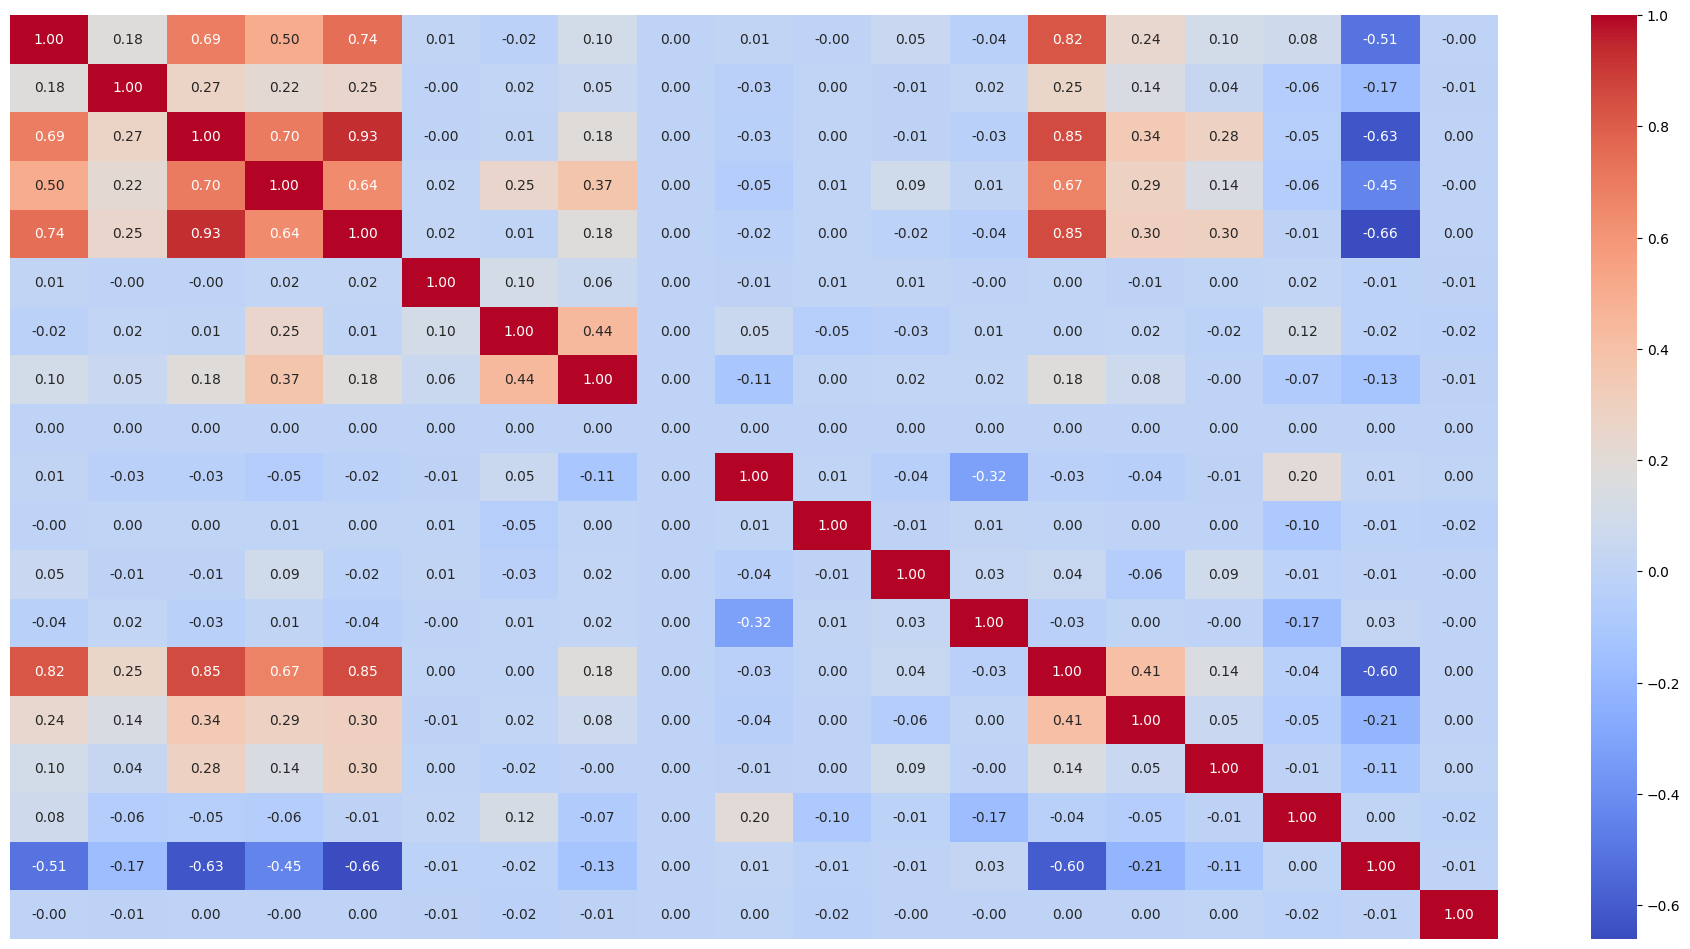

In [11]:

# Compute correlation matrix
correlation_matrix_normal = dfnormal_1.corr()

# Fill NaN values with 0
correlation_matrix_normal = correlation_matrix_normal.fillna(0)

# Plot heatmap
plt.figure(figsize=(24, 12))
sns.heatmap(correlation_matrix_normal, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=False, yticklabels=False)
plt.show()


In [12]:
# Set correlation threshold
threshold = 0.5

# Select features with correlation coefficient greater than threshold
selected_features_abnormal = set()  # Use set to avoid duplicates
for col in correlation_matrix_abnormal.columns:
    correlated_cols = correlation_matrix_abnormal.index[abs(correlation_matrix_abnormal[col]) > threshold].tolist()
    correlated_cols = [c for c in correlated_cols if c != col]  # Remove self-correlation
    selected_features_abnormal.update(correlated_cols)

# Select features with correlation coefficient greater than threshold
selected_features_normal = set()  # Use set to avoid duplicates
for col in correlation_matrix_normal.columns:
    correlated_cols = correlation_matrix_normal.index[abs(correlation_matrix_normal[col]) > threshold].tolist()
    correlated_cols = [c for c in correlated_cols if c != col]  # Remove self-correlation
    selected_features_normal.update(correlated_cols)

# Find common features
common_features = selected_features_abnormal.intersection(selected_features_normal)

# Print selected features
print("Selected features <----  abnormal:")
print(f'The length is {len(selected_features_abnormal)}')
for feature in selected_features_abnormal:
    print(feature)

print()

print("Selected features <----  normal:")
print(f'The length is {len(selected_features_normal)}')
for feature in selected_features_normal:
    print(feature)

print()

# Print common features
print("Common features between abnormal and normal:")
print(f'The length is {len(common_features)}')
for feature in common_features:
    print(feature)


Selected features <----  abnormal:
The length is 11
CONDUCTIVITY
TOTAL_UF
UF
TEMP
TMP
VENOUS
SYRINGE_FLOW_RATE
BLOOD_FLOW
TARGET_UF
MIN_BLOOD
MAX_BLOOD

Selected features <----  normal:
The length is 6
CONDUCTIVITY
TOTAL_UF
TEMP
VENOUS
TARGET_UF
DIA_FLOW

Common features between abnormal and normal:
The length is 5
CONDUCTIVITY
TOTAL_UF
TEMP
VENOUS
TARGET_UF


In [13]:
common_features

{'CONDUCTIVITY', 'TARGET_UF', 'TEMP', 'TOTAL_UF', 'VENOUS'}

In [14]:
# Filter the dataframes to keep only common features
dfAbnormal_common = dfAbnormal_1[list(common_features)].copy()
dfnormal_common = dfnormal_1[list(common_features)].copy()

# Add label columns
dfAbnormal_common['Label'] = 1
dfnormal_common['Label'] = 0

# Concatenate the dataframes
df_combined = pd.concat([dfAbnormal_common, dfnormal_common], ignore_index=True)

# Display the combined dataframe
# print(df_combined.head())


In [15]:
df_combined

,CONDUCTIVITY,TOTAL_UF,TEMP,VENOUS,TARGET_UF,Label
0,14.1,0.009,37.2,109.0,4.0,1
1,14.0,0.050,36.3,160.0,4.0,1
2,14.1,1.076,36.0,172.0,4.0,1
3,14.2,1.186,36.0,175.0,4.0,1
4,14.2,1.186,36.0,175.0,4.0,1
...,...,...,...,...,...,...
207673,14.1,3.500,36.9,72.0,3.5,0
207674,14.1,3.500,36.9,3.0,3.5,0
207675,14.1,3.500,36.9,27.0,3.5,0
207676,14.1,3.500,36.9,27.0,3.5,0


In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (assuming df_combined is already loaded as shown in the provided table)
# df_combined = pd.read_csv('path_to_your_file.csv')

# Standardize the data
# features = ['MAX_BLOOD', 'CONDUCTIVITY', 'BLOOD_FLOW', 'TEMP', 'TOTAL_UF', 'MIN_BLOOD']
x = df_combined.drop(columns="Label")
x = StandardScaler().fit_transform(x)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
x_tsne = tsne.fit_transform(x)

# Create a new dataframe with t-SNE results
df_tsne = pd.DataFrame(x_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['Label'] = df_combined['Label']

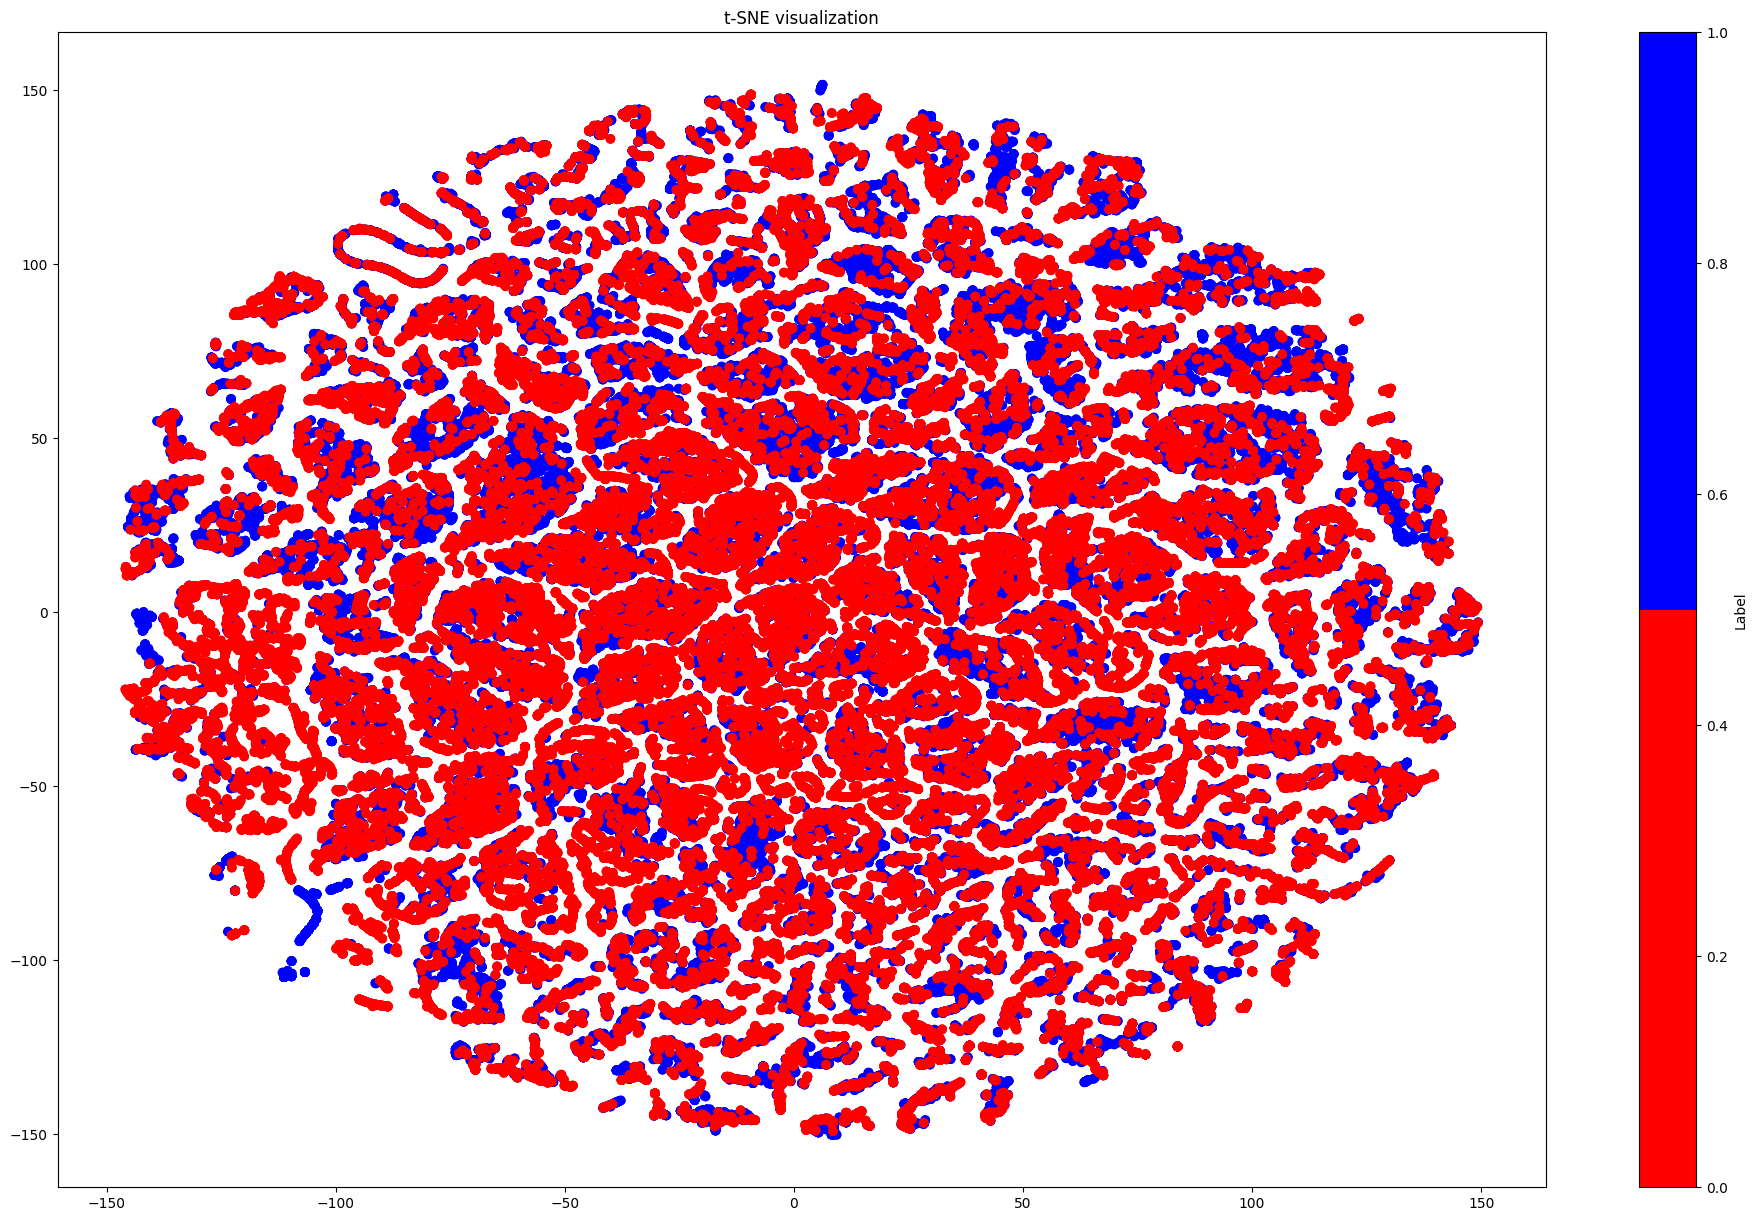

In [17]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


plt.figure(figsize=(24, 15))
scatter = plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], c=df_tsne['Label'], cmap=ListedColormap(['red', 'blue']))
plt.title('t-SNE visualization')
plt.colorbar(scatter, label='Label')
plt.show()


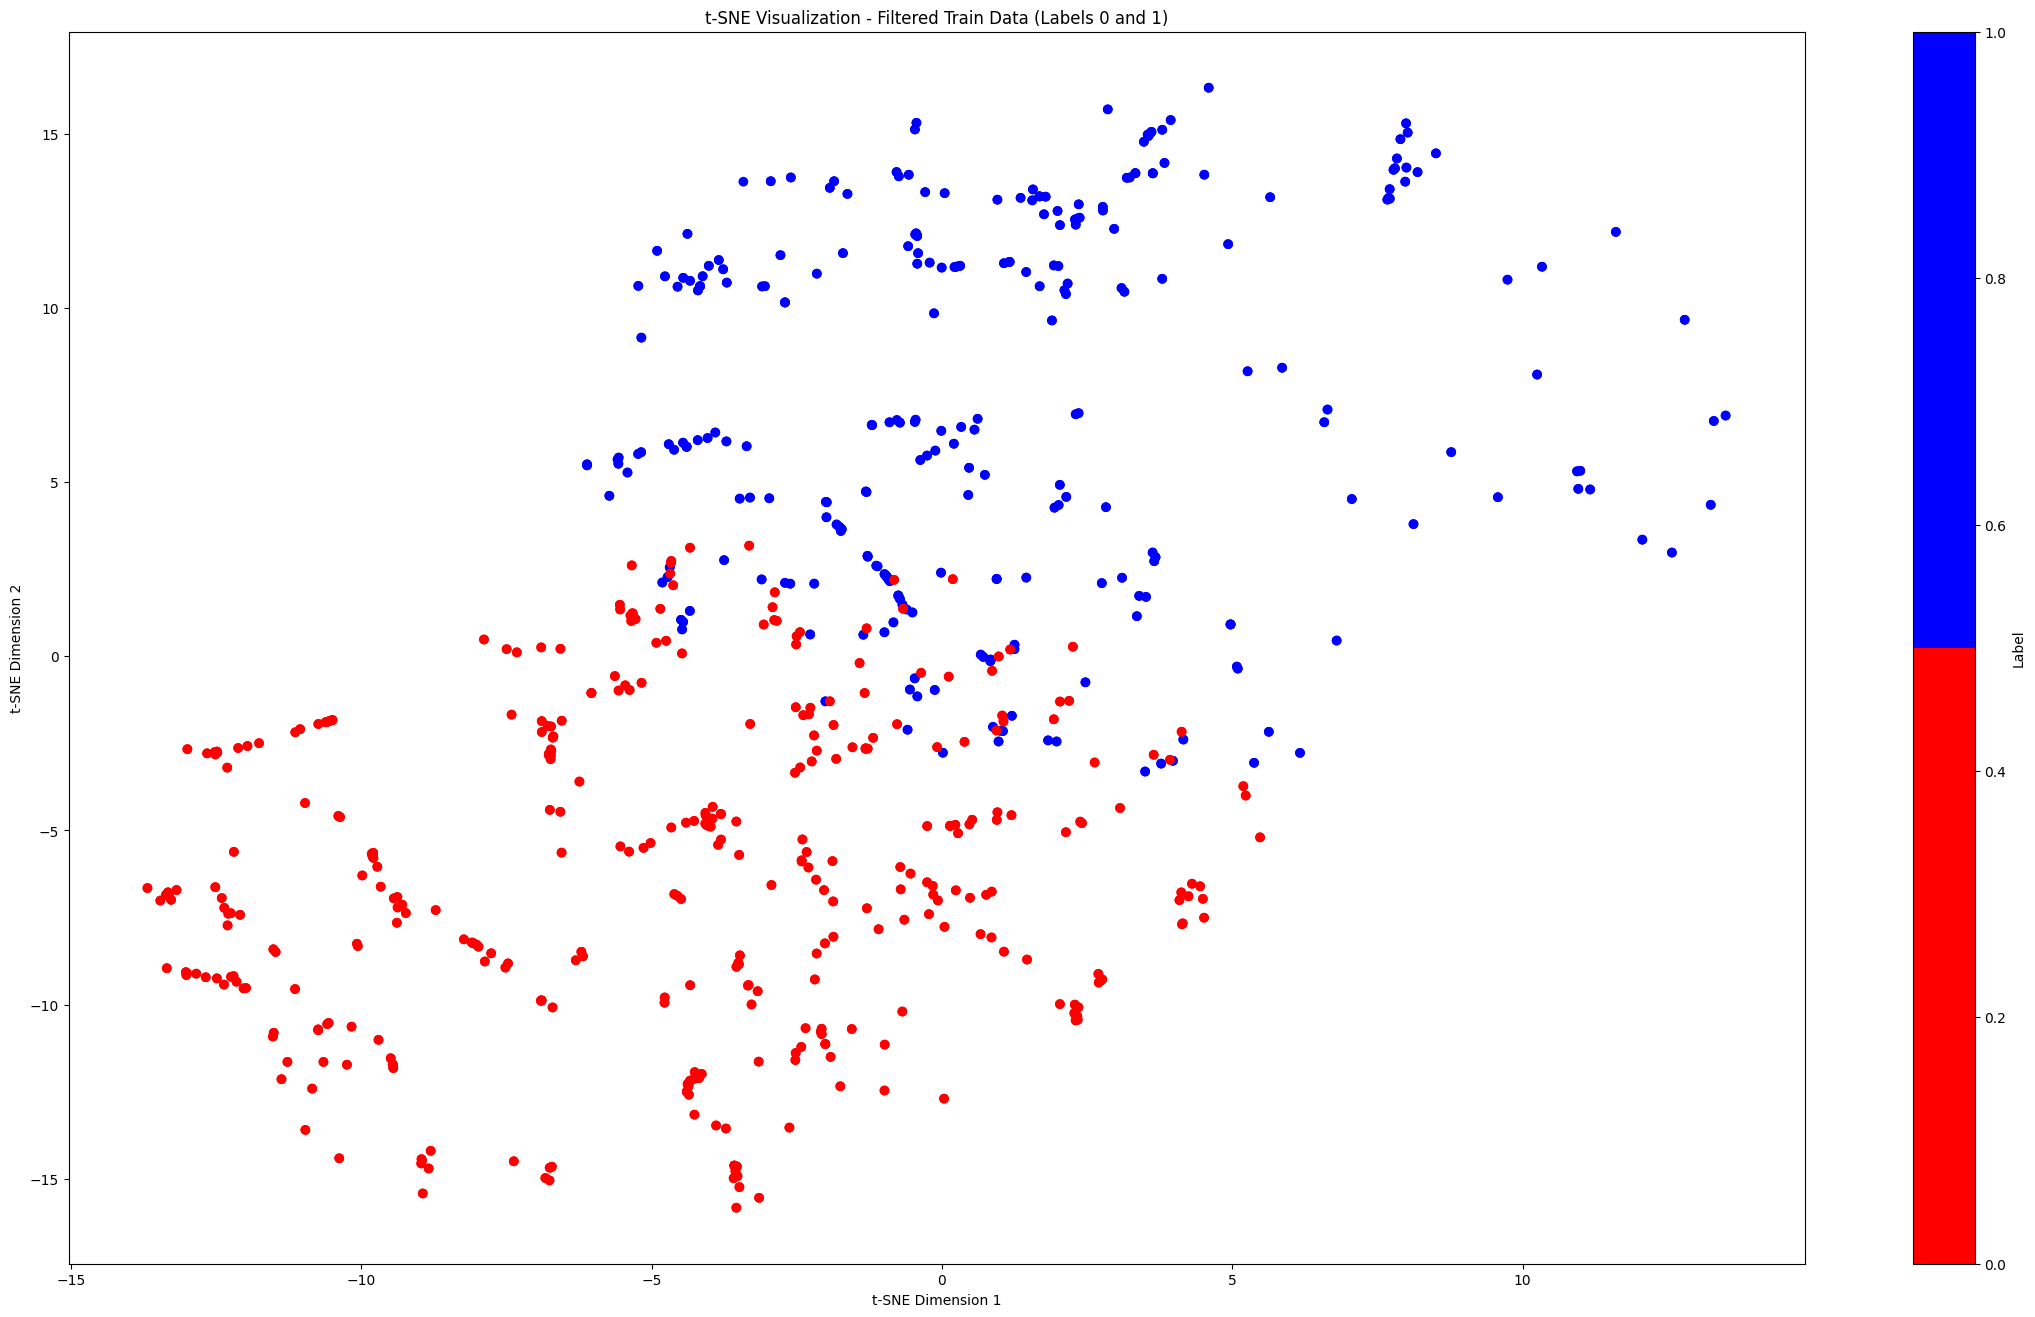

In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance
from matplotlib.colors import ListedColormap



# 创建一个新的DataFrame包含t-SNE结果
df_tsne = pd.DataFrame(x_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['Label'] = df_combined['Label']

# 将数据分为训练和测试集 (这里需要您具体的训练和测试集划分逻辑)
# 在此示例中，假设所有数据都是训练数据（请根据实际情况进行修改）
train_tsne_embedded = df_tsne[['TSNE1', 'TSNE2']].values
train_labels = df_tsne['Label'].values

# 计算类别的中心点
def compute_class_centers(points, labels):
    unique_labels = np.unique(labels)
    centers = {}
    for label in unique_labels:
        centers[label] = np.mean(points[labels == label], axis=0)
    return centers

# 定义阈值来过滤数据
distance_threshold = 10  # 这是一个示例阈值，请根据实际情况调整

# 筛选标签为0和1的训练数据点
train_mask = np.isin(train_labels, [0, 1])
train_tsne_embedded_01 = train_tsne_embedded[train_mask]
train_labels_01 = train_labels[train_mask]

# 计算训练数据的类别中心
train_class_centers = compute_class_centers(train_tsne_embedded_01, train_labels_01)

# 过滤训练数据
filtered_train_points = []
filtered_train_labels = []
for i, point in enumerate(train_tsne_embedded_01):
    label = train_labels_01[i]
    center = train_class_centers[label]
    if distance.euclidean(point, center) < distance_threshold:
        filtered_train_points.append(point)
        filtered_train_labels.append(label)

filtered_train_points = np.array(filtered_train_points)
filtered_train_labels = np.array(filtered_train_labels)


# 可视化过滤后的训练数据
plt.figure(figsize=(28, 16))
plt.scatter(filtered_train_points[:, 0], filtered_train_points[:, 1], c=filtered_train_labels, cmap=ListedColormap(['red', 'blue']))
plt.title('t-SNE Visualization - Filtered Train Data (Labels 0 and 1)')
plt.colorbar(label='Label')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()



In [34]:
# 创建一个哈希表，以加快查找速度
point_to_index = {tuple(point): index for index, point in enumerate(train_tsne_embedded)}

# 使用哈希表查找每个点的索引
indices = np.array([point_to_index[tuple(point)] for point in filtered_train_points])

selected_rows = df_combined.iloc[indices]

df_final = pd.DataFrame(selected_rows)

In [36]:
df_final

,CONDUCTIVITY,TOTAL_UF,TEMP,VENOUS,TARGET_UF,Label
57262,14.1,0.013,37.0,84.0,2.0,1
57263,14.1,0.015,37.1,84.0,1.7,1
57541,14.0,0.006,37.3,84.0,2.1,1
57731,14.0,0.014,37.0,84.0,2.2,1
59716,14.2,1.989,36.4,94.0,2.0,1
...,...,...,...,...,...,...
207517,14.2,1.446,37.2,84.0,2.9,0
207518,14.2,1.446,37.2,84.0,2.9,0
207522,14.2,2.185,37.2,84.0,2.9,0
207538,14.2,1.612,37.2,84.0,3.2,0


In [37]:
df_final.to_csv("../cnnData/correlation.csv")